In [66]:
%matplotlib inline
from __future__ import division
import numpy as np
from scipy import signal
import sigutils
import phasekick as pk
import lockin
import matplotlib.pyplot as plt
np.random.seed(12456)

# Direct measurement

Consider an experiment where have a signal with some dependence on a control variable,

$$x = H \ast u_1$$

In [203]:
t = np.linspace(-1, 10, 1101)
Gsamp = np.where(t > 0, np.exp(-t/3.0), 0)
Gfast = np.where(t > 0, np.exp(-t/0.15), 0)
u_hv = np.where(t > 0, 1, 0)

In [241]:
fir = lockin.lock2(f0=62e3, fp=3000, fc=12000, coeff_ratio=8, fs=1e6)

Response:
f   mag       dB
    0.000 1.000   -0.000
 1500.000 0.983   -0.152
 3000.000 0.927   -0.658
12000.000 0.095  -20.430
24000.000 0.000 -101.887
31000.000 0.000 -112.030
62000.000 0.000 -154.057
500000.000 0.000 -204.869


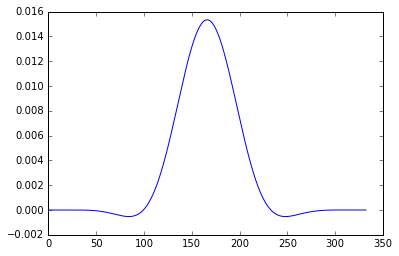

In [242]:
plt.plot(fir)

In [243]:
def df_G(x):
    return - np.cumsum(x) / np.sum(x)

def df_meas_cant(df_cant):
    return signal.convolve(df_cant, fir, 'full')[100:t_us.size+100]

t_us = np.arange(-100, 1e3+0.5)
G_us = -np.where(t_us > 0, np.exp(-t_us/3e2), 0)
df_cant = -np.cumsum(G_us)/np.sum(G_us)
G_us_fast = -np.where(t_us > 0, np.exp(-t_us/15.0), 0)
G_us_abrupt = -np.where(t_us > 0, np.exp(-t_us/7.5), 0)
df_cant_fast = -np.cumsum(G_us_fast)/np.sum(G_us_fast)
df_cant_abrupt = df_G(G_us_abrupt)



df_meas = signal.convolve(df_cant, fir, 'full')[100:t_us.size+100]
df_meas_fast = signal.convolve(df_cant_fast, fir, 'full')[100:t_us.size+100]
df_meas_abrupt = df_meas_cant(df_cant_abrupt)

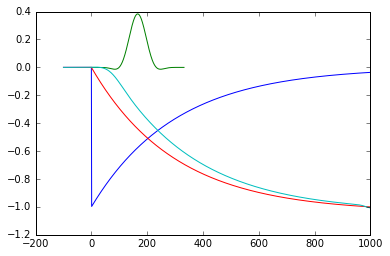

In [244]:
plt.plot(t_us, G_us)
plt.plot(np.arange(fir.size), fir*25)
plt.plot(t_us, df_cant)
plt.plot(t_us, signal.convolve(df_cant, fir, 'full')[100:t_us.size+100])

In [245]:
df_meas_cartoon = np.cumsum(-Gsamp)/np.sum(Gsamp)
df_meas_fast_cartoon = np.cumsum(-Gfast)/np.sum(Gfast)

In [248]:
(fir.size-1)/2

166.0

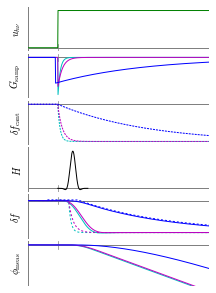

In [276]:
dash2 = (2,1)
dashes = (2,2)

fig, axe = plt.subplots(nrows=6, figsize=(3.25, 5))
fig.subplots_adjust(hspace=0.05)
axe[1].plot(t_us/100.0, -G_us_abrupt/np.min(G_us_abrupt), 'c')
axe[1].plot(t, -Gfast/1.2, 'm')
axe[1].plot(t-0.08, -Gsamp/1.2/1.2, 'b')
axe[1].set_ylim(-1.1, 0.1)

axe[0].plot(t, u_hv, 'g')
axe[0].set_ylim(-0.1, 1.1)

axe[2].plot(t_us/100.0, df_cant_abrupt, 'c--', dashes=dash2)
axe[2].plot(t, df_meas_fast_cartoon, 'm--', dashes=dash2)
axe[2].plot(t, df_meas_cartoon, 'b--', dashes=dash2)
axe[2].set_ylim(-1.1, 0.1)

axe[3].plot(np.arange(fir.size)/fir.size, fir/np.max(fir), 'k')
axe[3].set_ylim(-0.1, 1.1)

t_us_delay = t_us + (fir.size-1)/2 - 100
t_us_delay_fast = t_us + (fir.size-1)/2 - 130
axe[4].plot(t_us_delay_fast/100.0, df_cant_abrupt, 'c--', dashes=dashes)
axe[4].plot(t_us/100.0, df_meas_abrupt, 'c')
axe[4].plot(t_us_delay_fast/100.0, df_cant_fast, 'm--', dashes=dashes)
axe[4].plot(t_us/100.0, df_meas_fast, 'm')
axe[4].plot(t_us_delay/100.0, df_cant+0.025, 'b--', dashes=dashes)
axe[4].plot(t_us/100.0, df_meas, 'b')

axe[5].plot(t_us/100.0, -np.cumsum(df_meas_abrupt) / np.sum(df_meas)*2, 'c')
axe[5].plot(t_us/100.0, -np.cumsum(df_meas_fast) / np.sum(df_meas)*2, 'm')
axe[5].plot(t_us/100.0, -np.cumsum(df_meas) / np.sum(df_meas)*2, 'b')


axe[5].set_ylim(-1.1, 0.1)

axe[1].set_ylabel("$G_{\\mathrm{samp}}$")
axe[0].set_ylabel("$u_{h\\nu}$")
axe[2].set_ylabel("$\\delta f_{\\mathrm{cant}}$")
axe[3].set_ylabel("$H$")
axe[4].set_ylabel("$\\delta f$")
axe[5].set_ylabel("$\\phi_{\\mathrm{meas}}$")
for ax in axe:
    ax.axhline(color='0.5', zorder=0)
    ax.axvline(color='0.5', x=-1, zorder=0)
    ax.plot([0, 0], [-0.1, 0.1], linewidth=0.7, color='0.5',zorder=0)
    ax.set_xlim(-1, 5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

fig.savefig('../../figs/03-new-direct-indirect.pdf', bbox_inches='tight', transparent=True)
# axe[5].set_xlim(-0.2, 2)
# axe[5].set_ylim(-0.3, 0.03)

In [240]:
!open ../../figs/03-new-direct-indirect.pdf

## hp = signal.butter(1, 1e3*2*np.pi, btype='highpass', analog=True)

(<matplotlib.figure.Figure at 0x114c61ed0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x113af3a50>,
  <matplotlib.axes._subplots.AxesSubplot at 0x114772290>))

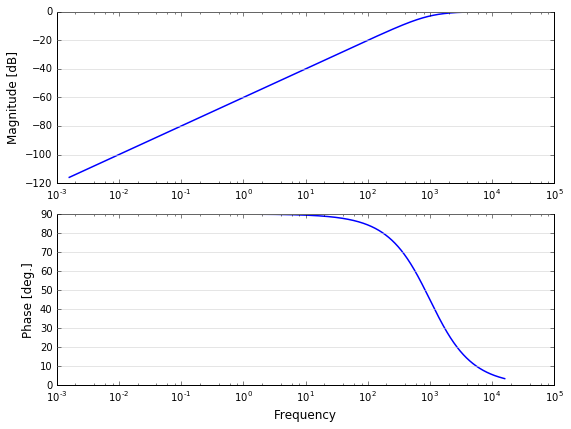

In [27]:
sigutils.bode_sys(hp)

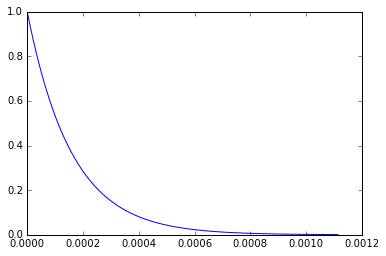

In [32]:
step_hp = signal.step(hp)
plt.plot(step_hp[0], step_hp[1])

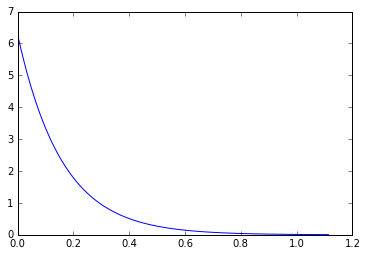

In [29]:
impd = signal.impulse2(hp)
imp_L = signal.impulse(signal.butter(1, 200e3*2*np.pi, btype='lowpass', analog=True))

for im in [impd]:
    if -np.min(im[1]) > np.max(im[1]):
        sign = -1
    else:
        sign = 1
    plt.plot(im[0]*1e3, sign*im[1]/1e3)


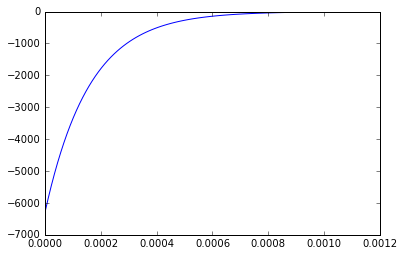

In [30]:
plt.plot(impd[0], impd[1])

In [170]:
N = 1e6
fs = 500e6
fnyq = fs /2
tau = 100e-6
tau2 = tau * 3
dt = 1 / fs
t0 = -1e-3
t = np.arange(N)*dt + t0
t_ms = t * 1e3

u = np.where(t >= 0., 1., 0)
u_norm = np.where(t >= 0., 1, 0) 
H_b, H_a = signal.butter(1, 1/(2*np.pi*tau*fnyq))
H_b2, H_a2 = signal.butter(1, 1/(2*np.pi*tau2*fnyq))
D_b, D_a = signal.butter(1, 10e3/fnyq)
x = signal.lfilter(H_b, H_a, u)
yn = np.random.randn(N)
yn2 = np.random.randn(N)
x2 = signal.lfilter(H_b2, H_a2, u)
y = signal.lfilter(D_b, D_a, x + yn)
y2 = signal.lfilter(D_b, D_a, x2 + yn2)

/Users/ryandwyer/anaconda/envs/1605-phasekick/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ryandwyer/anaconda/envs/1605-phasekick/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


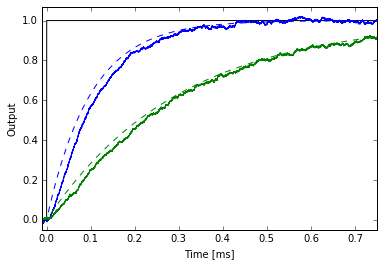

In [171]:
plt.plot(t_ms, u_norm, 'k', label="$u_1$")
plt.plot(t_ms, x, 'b--', label="x")
plt.plot(t_ms, y, 'b-', label='y')
plt.plot(t_ms, x2, 'g--')
plt.plot(t_ms, y2, 'g-')
plt.ylim(-0.05, 1.07)
plt.xlim(-0.01, 0.75)
plt.xlabel("Time [ms]")
plt.ylabel("Output")

What happens if we use a 1 µs time constant?

In [172]:
tau = 0.1e-6
tau2 = tau * 3

t_us = t_ms * 1e3

u = np.where(t >= 0., 1., 0)
u_norm = np.where(t >= 0., 1, 0) 
H_b, H_a = signal.butter(1, 1/(2*np.pi*tau*fnyq))
H_b2, H_a2 = signal.butter(1, 1/(2*np.pi*tau2*fnyq))
D_b, D_a = signal.butter(1, 10e3/fnyq)
x = signal.lfilter(H_b, H_a, u)
x2 = signal.lfilter(H_b2, H_a2, u)
y = signal.lfilter(D_b, D_a, x + yn)
y2 = signal.lfilter(D_b, D_a, x2 + yn2)

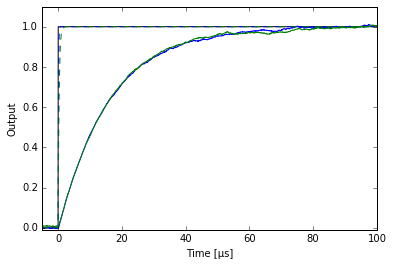

In [173]:
plt.plot(t_us[::10], u_norm[::10], 'k', label="$u_1$")
plt.plot(t_us[::10], x[::10], 'b--', label="x")
plt.plot(t_us[::10], y[::10], 'b-', label='y')
plt.plot(t_us[::10], x2[::10], 'g--', label="x")
plt.plot(t_us[::10], y2[::10], 'g-', label='y')
plt.ylim(-0.01, 1.1)
plt.xlim(-5, 100)
plt.xlabel(u"Time [µs]")
plt.ylabel("Output")

All we see are the detector dynamics.

# Autocorrelation techniques

- For a linear system, we see nothing else.

    $$
    y = H \ast u_1 + k u_2
    $$

- For any non-linear system, we see a low-frequency autocorrelation signal.
    
    $$
    y = (H \ast u_1) u_2
    $$

In [185]:
tau = 0.1e-6
tau2 = tau * 3

t_us = t_ms * 1e3

u = np.where(t >= 0., (signal.square(t*100e3)+1)/2, 0)

H_b, H_a = signal.butter(1, 1/(2*np.pi*tau*fnyq))
H_b2, H_a2 = signal.butter(1, 1/(2*np.pi*tau2*fnyq))
D_b, D_a = signal.butter(1, 10e3/fnyq)
x = signal.lfilter(H_b, H_a, u)
x2 = signal.lfilter(H_b2, H_a2, u)
y = signal.lfilter(D_b, D_a, x + yn)
y2 = signal.lfilter(D_b, D_a, x2 + yn2)

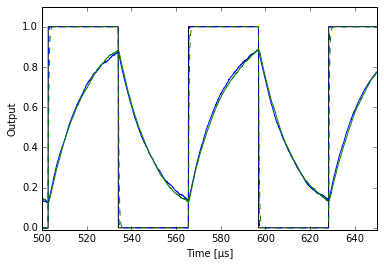

In [193]:
plt.plot(t_us[::10], u[::10], 'k', label="$u_1$")
plt.plot(t_us[::10], x[::10], 'b--', label="x")
plt.plot(t_us[::10], y[::10], 'b-', label='y')
plt.plot(t_us[::10], x2[::10], 'g--', label="x")
plt.plot(t_us[::10], y2[::10], 'g-', label='y')
plt.ylim(-0.01, 1.1)
plt.xlim(500, 650)
plt.xlabel(u"Time [µs]")
plt.ylabel("Output")

In [231]:
u1 = np.where(t >= 0., (signal.square(t*10e6, duty=0.1)+1)/2, 0)
u2 = np.where(t >= 0., (signal.square(t*10e6 - 0.3, duty=0.1)+1)/2, 0)

(-0.01, 1.5)

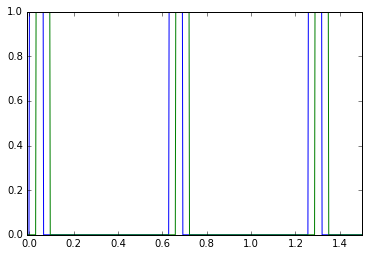

In [232]:
plt.plot(t_us, u1)
plt.plot(t_us, u2)
plt.xlim(-0.01, 1.5)